<a href="https://colab.research.google.com/github/AbbasAli01/Machine-Learning-Projects/blob/main/Waiter's_Tip_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd

In [81]:
df = pd.read_csv('tips.csv')

In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
df.shape

(244, 7)

In [84]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [85]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['day'].value_counts())
print(df['time'].value_counts())

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-87-c26a3dc21966>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='tip', data=df, estimator=sum, ci=None)


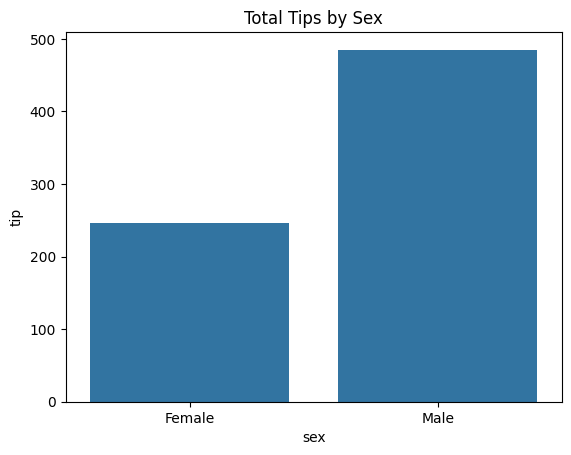

In [87]:
# Bar plot to show average tips by sex
sns.barplot(x='sex', y='tip', data=df, estimator=sum, ci=None)
plt.title('Total Tips by Sex')
plt.show()

<ipython-input-88-bf6dcb0922f5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='tip', data=df, estimator=sum, ci=None)


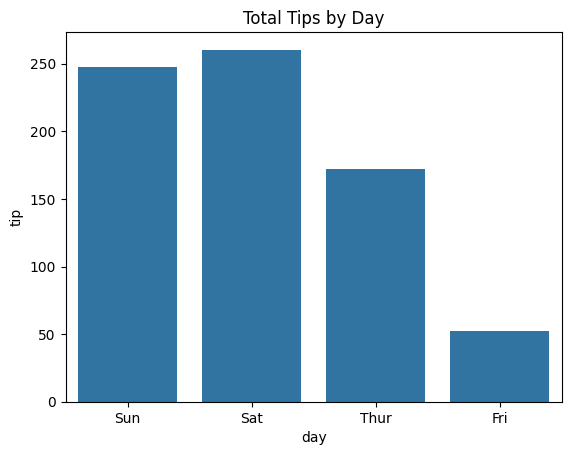

In [88]:
# Bar plot to show total tips by day
sns.barplot(x='day', y='tip', data=df, estimator=sum, ci=None)
plt.title('Total Tips by Day')
plt.show()

<ipython-input-89-ca028d40a9eb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time', y='tip', data=df, estimator=sum, ci=None)


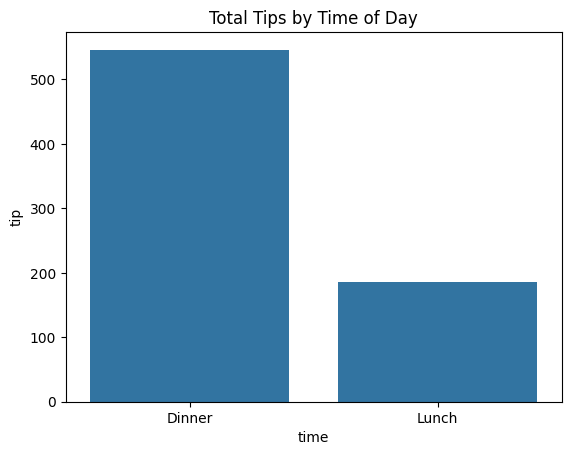

In [89]:
# Bar plot to show total tips by time of day
sns.barplot(x='time', y='tip', data=df, estimator=sum, ci=None)
plt.title('Total Tips by Time of Day')
plt.show()

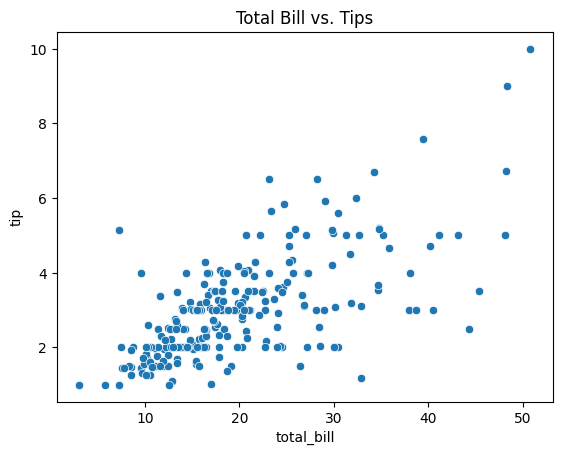

In [49]:
# Scatter plot to show relationship between total bill and tips
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs. Tips')
plt.show()

<ipython-input-50-997b41ff9640>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='smoker', y='tip', data=df, estimator=sum, ci=None)


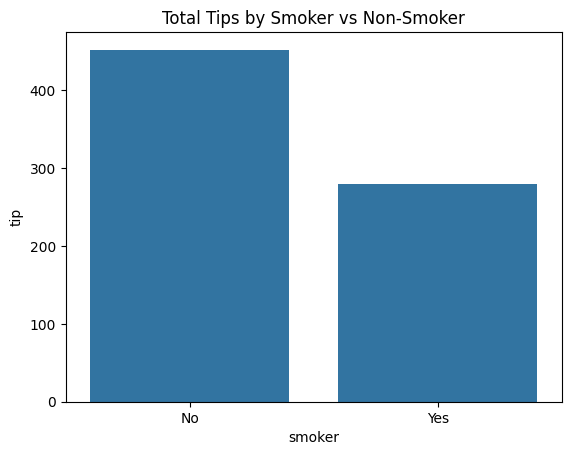

In [50]:
# Bar plot to show total tips by smoker status
sns.barplot(x='smoker', y='tip', data=df, estimator=sum, ci=None)
plt.title('Total Tips by Smoker vs Non-Smoker')
plt.show()

In [51]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df = pd.get_dummies(df, columns=['day', 'time'], drop_first=True)

In [52]:
df.head()

,total_bill,tip,sex,smoker,size,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,1,0,2,False,True,False,False
1,10.34,1.66,0,0,3,False,True,False,False
2,21.01,3.50,0,0,3,False,True,False,False
3,23.68,3.31,0,0,2,False,True,False,False
4,24.59,3.61,1,0,4,False,True,False,False


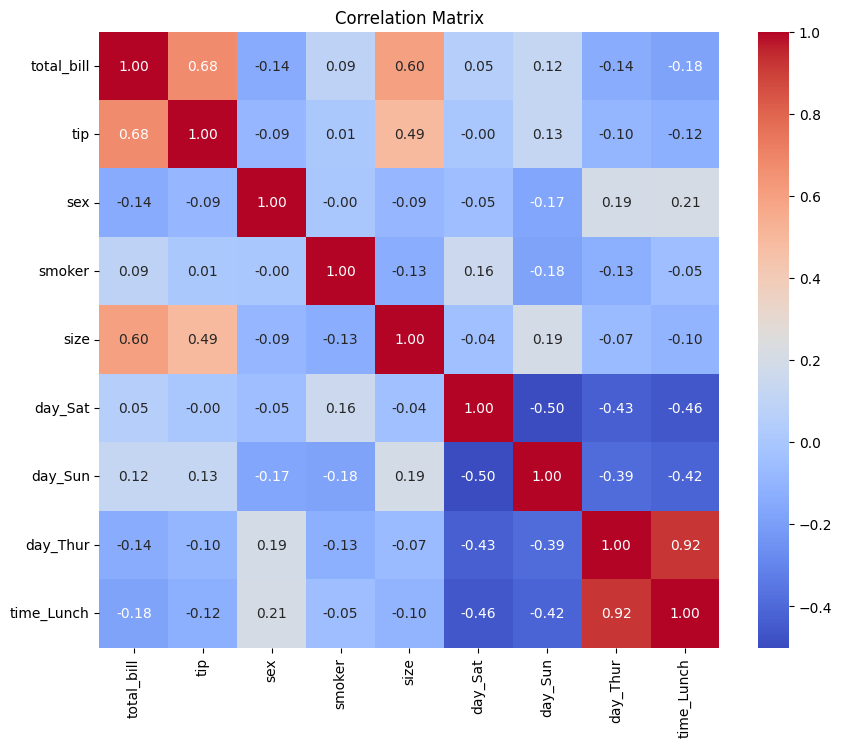

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [69]:
from sklearn.model_selection import train_test_split

X = df.drop('tip', axis=1)
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    model_prediction = model.predict(X_test)
    mse = mean_squared_error(y_test, model_prediction)
    r2 = r2_score(y_test, model_prediction)
    print(f"{model_name} - MSE: {mse}, R^2: {r2}")

In [91]:
# 1. Decision Tree
dtr = DecisionTreeRegressor(random_state=42)
evaluate_model(dtr, X_train, X_test, y_train, y_test, 'Decision Tree')

Decision Tree - MSE: 1.2825346938775513, R^2: -0.026051276077565744


In [92]:
# 2. Random Forest
rfr = RandomForestRegressor(random_state=42)
evaluate_model(rfr, X_train, X_test, y_train, y_test, 'Random Forest')

Random Forest - MSE: 0.9299510948979601, R^2: 0.256022069293916


In [74]:
# 3. Linear Regression
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test, 'Linear Regression')

Linear Regression - MSE: 0.7033566017436106, R^2: 0.43730181943482493


In [75]:
# Scale the data (for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
# 4. Support Vector Machine
svr = SVR()
evaluate_model(svr, X_train_scaled, X_test_scaled, y_train, y_test, 'Support Vector Machine')

Support Vector Machine - MSE: 0.774938509943386, R^2: 0.3800349801024778


In [94]:
# 5. K-Nearest Neighbors
knr = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knr, X_train_scaled, X_test_scaled, y_train, y_test, 'K-Nearest Neighbors')

K-Nearest Neighbors - MSE: 0.9029365714285715, R^2: 0.27763418350081626
